In [11]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import statsmodels.api as sm
import statsmodels


from fredapi import Fred
import pandas_datareader as pdr

import warnings

In [12]:
sk.set_config(display='diagram')
warnings.filterwarnings("ignore")


In [13]:
fred = Fred(api_key='c0a3f23bdd23a65e6546b6d0e5f4d4a5')

# Load Data

In [150]:
#  Set start date
#start_date = datetime.date(1982, 1, 1)
start_date = datetime.date(1940, 1, 1)
start_date_str = datetime.datetime.strftime(start_date, "%Y-%m-%d")

#  Federal Reserve Economic Data Service
data_source = 'fred'
unemployment_rate_code = 'UNRATE'
cpi_code = 'CORESTICKM157SFRBATL'
real_rate_code = 'REAINTRATREARAT1MO'

cpi_urban = 'CPIAUCSL'
inf_10y = 'T10YIEM'
ff_rate_code = 'EFFR'
#CPIAUCSL
#CORESTICKM157SFRBATL

#GDP GAP
p_gdp = 'GDPPOT'



#  Fetch data
#unemployment_rate_df = pdr.DataReader(unemployment_rate_code, data_source, start_date)
#cpi_df = pdr.DataReader(cpi_code, data_source, start_date)
real_rate_df = pdr.DataReader(real_rate_code, data_source, start_date)

#cpi_urban_df = pdr.DataReader(cpi_urban, data_source, start_date)
inf_10y_df = pdr.DataReader(inf_10y, data_source, start_date)
#ff_rate_df = pdr.DataReader(ff_rate_code, data_source, start_date)

In [15]:
pdr.DataReader(['GDPC1','GDPPOT'], data_source)

,GDPC1,GDPPOT
DATE,,
2019-01-01,20415.150,18971.807395
2019-04-01,20584.528,19061.787614
2019-07-01,20817.581,19154.508562
2019-10-01,20951.088,19247.215240
2020-01-01,20665.553,19336.519436
2020-04-01,19034.830,19419.266353
2020-07-01,20511.785,19490.371350
2020-10-01,20724.128,19573.103807
2021-01-01,20990.541,19661.616617


In [16]:
pdr.DataReader(['FEDFUNDS','PCEPILFE','GDPC1','GDPPOT'], data_source, start_date)

,FEDFUNDS,PCEPILFE,GDPC1,GDPPOT
DATE,,,,
1950-01-01,NaN,NaN,2346.104,2218.566586
1950-04-01,NaN,NaN,2417.682,2248.161822
1950-07-01,NaN,NaN,2511.127,2277.049682
1950-10-01,NaN,NaN,2559.214,2306.715167
1951-01-01,NaN,NaN,2593.967,2336.504742
...,...,...,...,...
2023-06-01,5.08,119.189,NaN,NaN
2023-07-01,5.12,119.449,NaN,20603.700000
2023-08-01,5.33,119.622,NaN,NaN


In [17]:
real_rate_df

,REAINTRATREARAT1MO
DATE,
1982-01-01,2.464018
1982-02-01,4.981599
1982-03-01,7.594187
1982-04-01,8.803434
1982-05-01,8.567456
...,...
2023-06-01,6.004632
2023-07-01,2.854389
2023-08-01,3.100313


In [18]:
inf_10y_df

,T10YIEM
DATE,
2003-01-01,1.76
2003-02-01,1.91
2003-03-01,1.87
2003-04-01,1.78
2003-05-01,1.66
...,...
2023-05-01,2.21
2023-06-01,2.20
2023-07-01,2.30


In [19]:
df = pdr.DataReader([unemployment_rate_code,cpi_code,real_rate_code,cpi_urban,inf_10y,ff_rate_code], 
               data_source, start_date)

df = pd.concat([unemployment_rate_df,cpi_df,real_rate_df], axis=1)
#df.reset_index(inplace=True)
df.sort_index(inplace=True)
#df.asfreq('1D')
df.columns = ['un_emp_rate','cpi_rate','real_rate']
df

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6763 entries, 1950-01-01 to 2023-10-16
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNRATE                885 non-null    float64
 1   CORESTICKM157SFRBATL  681 non-null    float64
 2   REAINTRATREARAT1MO    502 non-null    float64
 3   CPIAUCSL              885 non-null    float64
 4   T10YIEM               249 non-null    float64
 5   EFFR                  5848 non-null   float64
dtypes: float64(6)
memory usage: 369.9 KB


# Analysis

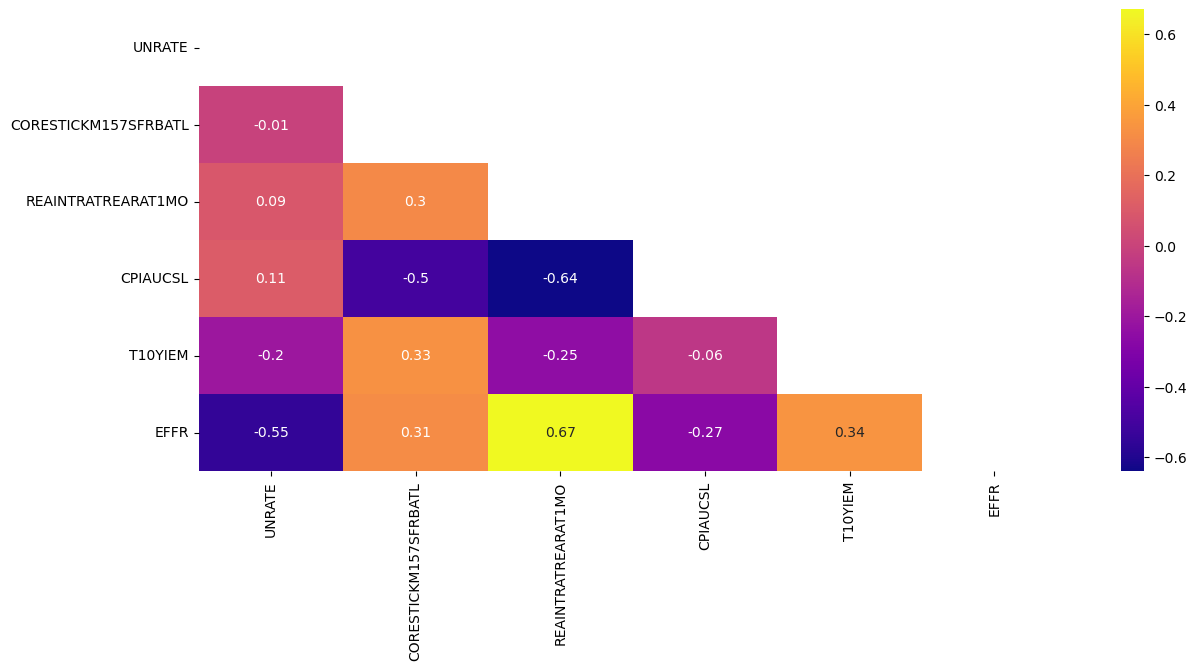

In [21]:
t_df = df

plt.figure(figsize=(14,6))
mask = np.zeros_like(t_df.corr())
mask[np.triu_indices_from(mask)] = True
_p = sns.heatmap(t_df.corr().round(2), annot=True, mask=mask, cmap="plasma")

# Graph

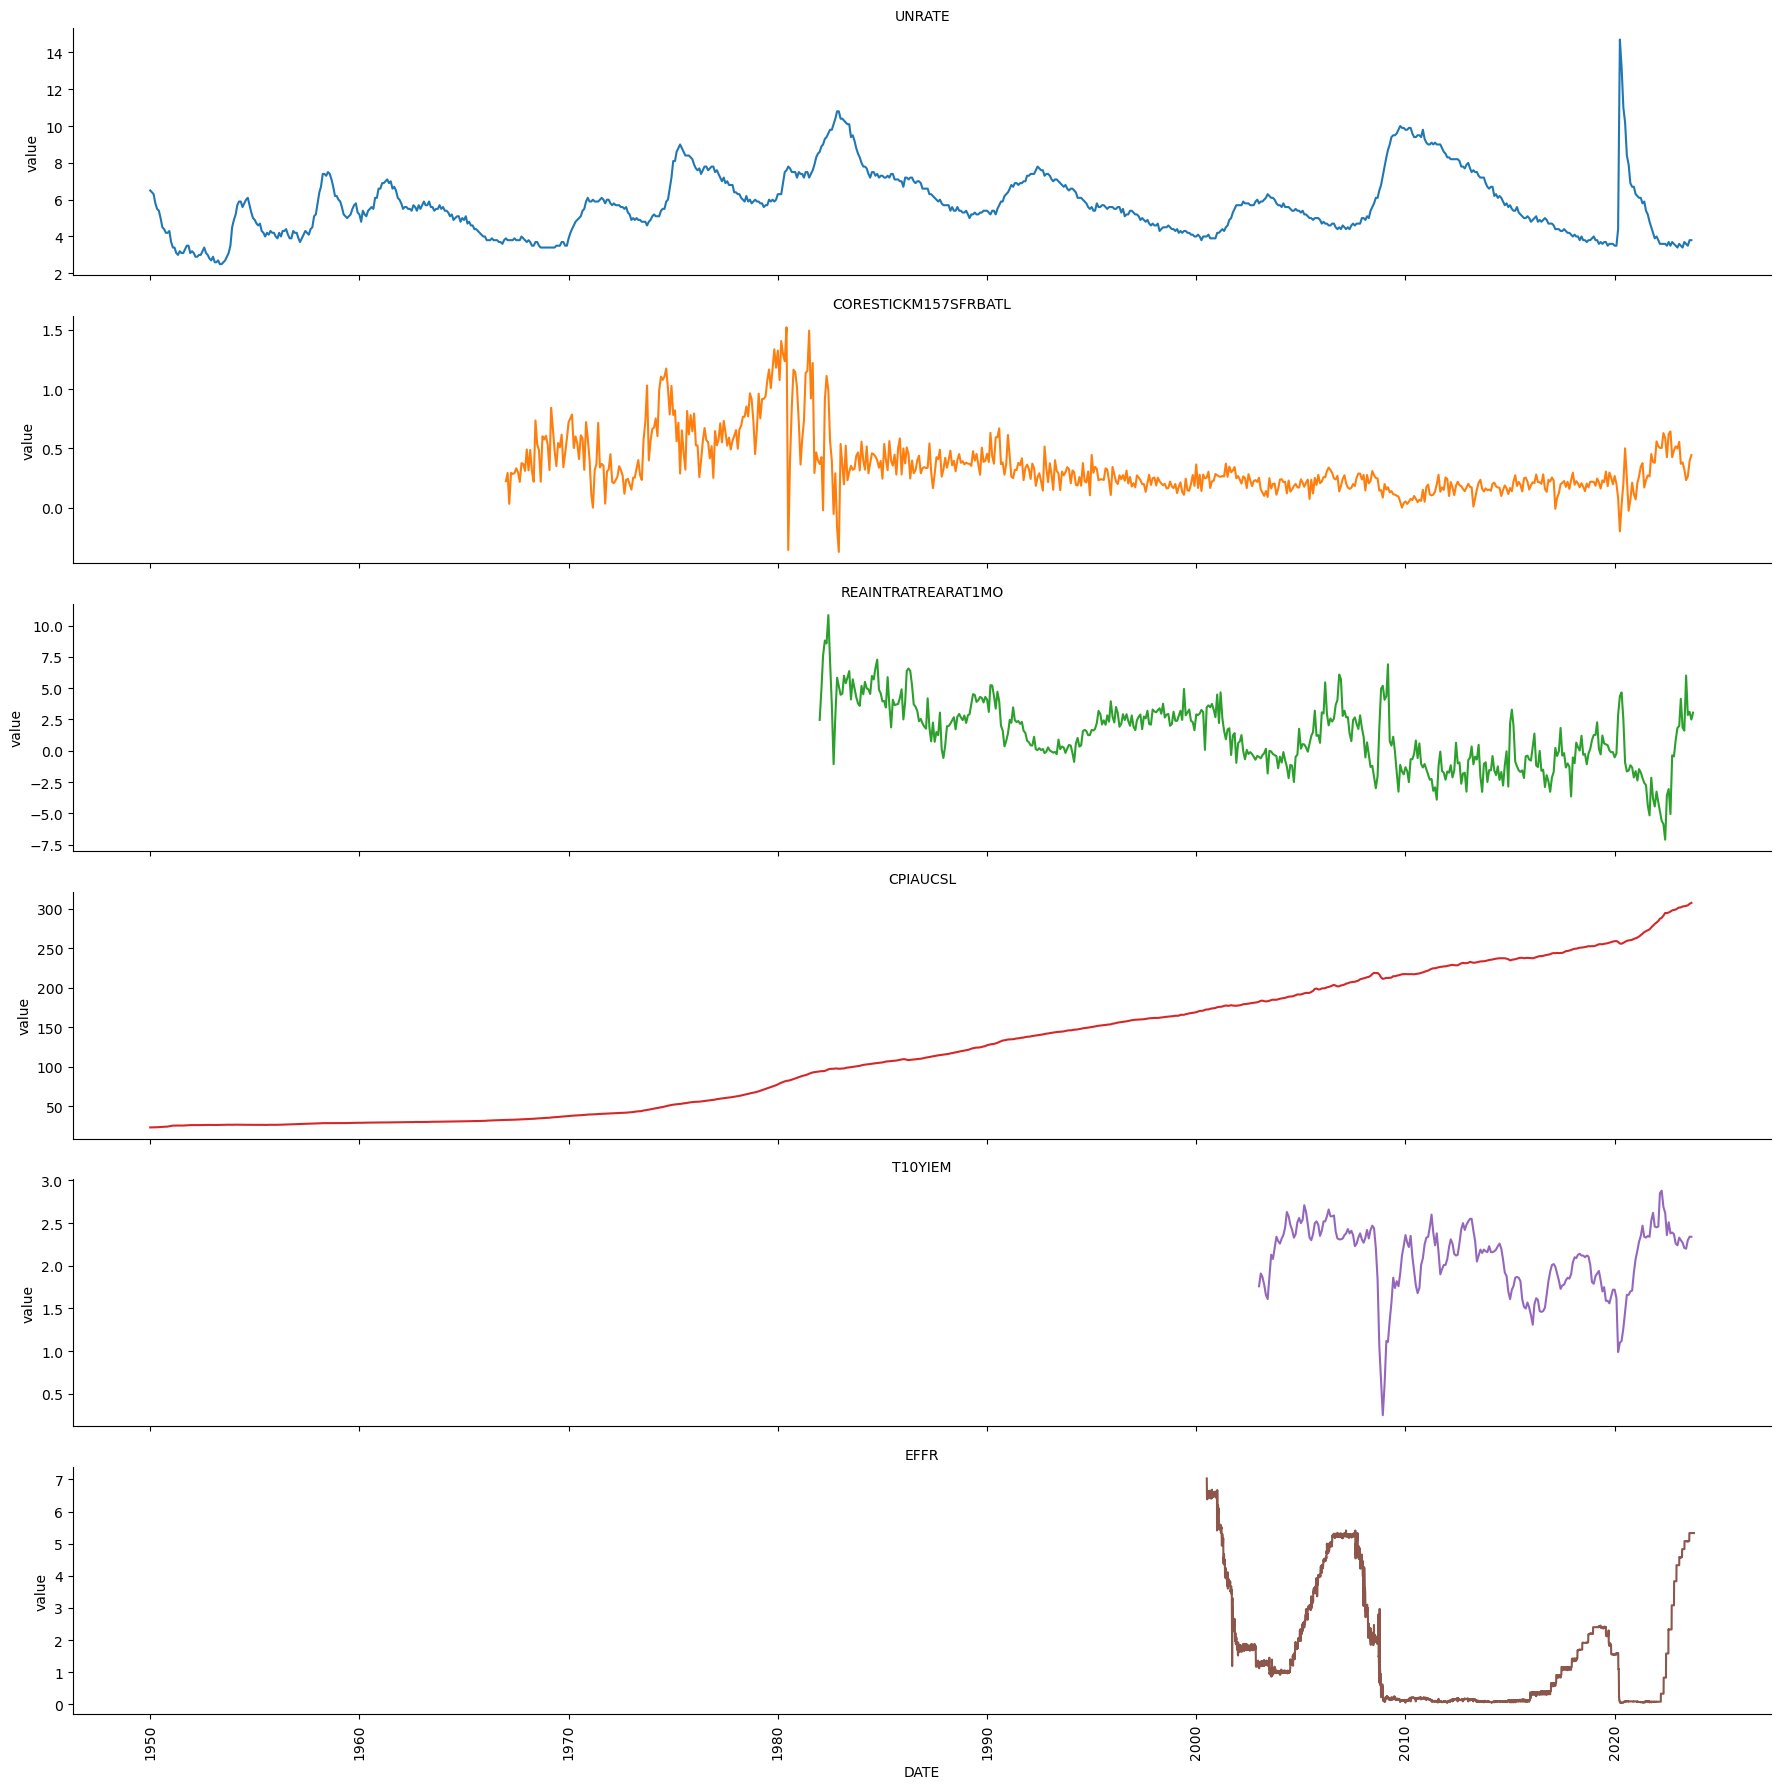

In [22]:
long_df = df.copy()
long_df.reset_index(inplace=True)

long_df = long_df.melt(id_vars=['DATE'])


# Graph
g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.tight_layout()
g.map_dataframe(sns.lineplot, y="value", x="DATE")

plt.show()

In [23]:
r_df = round(df,2)
r_df

,UNRATE,CORESTICKM157SFRBATL,REAINTRATREARAT1MO,CPIAUCSL,T10YIEM,EFFR
DATE,,,,,,
1950-01-01,6.5,NaN,NaN,23.51,NaN,NaN
1950-02-01,6.4,NaN,NaN,23.61,NaN,NaN
1950-03-01,6.3,NaN,NaN,23.64,NaN,NaN
1950-04-01,5.8,NaN,NaN,23.65,NaN,NaN
1950-05-01,5.5,NaN,NaN,23.77,NaN,NaN
...,...,...,...,...,...,...
2023-10-10,NaN,NaN,NaN,NaN,NaN,5.33
2023-10-11,NaN,NaN,NaN,NaN,NaN,5.33
2023-10-12,NaN,NaN,NaN,NaN,NaN,5.33


fig, ax = plt.subplots(figsize=(16,8))

#size_rate = df.eval("real_rate * 10000").rename("size_rate")
sns.scatterplot(data=df, x="un_emp_rate", y="cpi_rate", hue='real_rate', size="real_rate", 
                sizes=(1, 200), 
                legend='brief',
                palette="ch:s=.25,rot=-.25"
               )

# annotations
ax.set_title('Scatterplot')
#ax.set(xlabel='month', ylabel='return')
#ax.set(ylabel='market value')

plt.show()

# Taylor
The FRED® Blog
https://fredblog.stlouisfed.org/2014/04/the-taylor-rule/

This graph shows in blue the Taylor Rule, which is a simple formula that John Taylor devised to guide policymakers. It calculates what the federal funds rate should be, as a function of the output gap and current inflation. Here, we measure the output gap as the difference between potential output (published by the Congressional Budget Office) and real GDP. Inflation is measured by changes in the CPI, and we use a target inflation rate of 2%. We also assume a steady-state real interest rate of 2%. These are a lot of assumptions, and you are welcome to change them on the graph by playing around with the formula to see how the Taylor Rule matches up with the effective federal funds rate. To read up on the Taylor Rule, see the original article or an article by former St. Louis Fed president William Poole.

How this graph was created: To create a new series from several series, first add the series by modifying the existing series in the “Graph” tab. Once you have assembled them all, expand the series section in the same tab and “create your own transformation.” Finally, as the axis legend has become unwieldy, remove it by checking off the mark in the graph tab.

Suggested by: Christian Zimmermann

Update: A previous version did not multiply the output gap by 100.

View on FRED, series used in this post: FEDFUNDS, GDPC1, GDPDEF, GDPPOT

## From Fred

In [162]:
df = pdr.DataReader(['GDPC1','GDPPOT','GDPDEF_PC1','FEDFUNDS'], data_source, start_date)
df.dropna(inplace=True)
df

,GDPC1,GDPPOT,GDPDEF_PC1,FEDFUNDS
DATE,,,,
1954-07-01,2880.482,2727.099666,13.574,0.80
1954-10-01,2936.852,2743.726730,13.611,0.85
1955-01-01,3020.746,2760.136280,13.675,1.39
1955-04-01,3069.910,2777.950765,13.731,1.43
1955-07-01,3111.379,2795.471543,13.827,1.68
...,...,...,...,...
2022-04-01,21708.160,20153.810000,117.671,0.33
2022-07-01,21851.134,20245.660000,118.962,1.68
2022-10-01,21989.981,20334.210000,120.093,3.08


In [161]:
#taylor_df = pd.DataFrame()
df['ffef_tr'] = df['GDPDEF_PC1'] + 2    \
                        +0.5*(df['GDPDEF_PC1'] - 2)    \
                        +0.5*(df['GDPC1'] - df['GDPPOT']) / df['GDPPOT']

df.tail(10)

,GDPC1,GDPPOT,GDPDEF_PC1,FEDFUNDS,ffef_tr
DATE,,,,,
2021-01-01,20990.541,19661.616617,107.668,0.09,162.535795
2021-04-01,21309.544,19756.957426,109.305,0.07,164.996792
2021-07-01,21483.083,19856.923211,110.920,0.10,167.420947
2021-10-01,21847.602,19957.974448,112.848,0.08,170.319340
2022-01-01,21738.871,20057.880000,115.135,0.08,173.744404
2022-04-01,21708.160,20153.810000,117.671,0.33,177.545062
2022-07-01,21851.134,20245.660000,118.962,1.68,179.482650
2022-10-01,21989.981,20334.210000,120.093,3.08,181.180214
2023-01-01,22112.329,20420.680000,121.261,4.33,182.932920


In [25]:
base_df = pd.read_csv('./data/fred.csv', parse_dates=['fund_date','taylor_date'])
base1_df = base_df[['fund_date','FEDFUNDS']].dropna().copy()
base1_df.sort_values(by='fund_date', inplace = True)
base2_df = base_df[['taylor_date','GDPPOT_GDPC1_GDPDEF_PC1']].copy()
base2_df.sort_values(by='taylor_date', inplace = True)

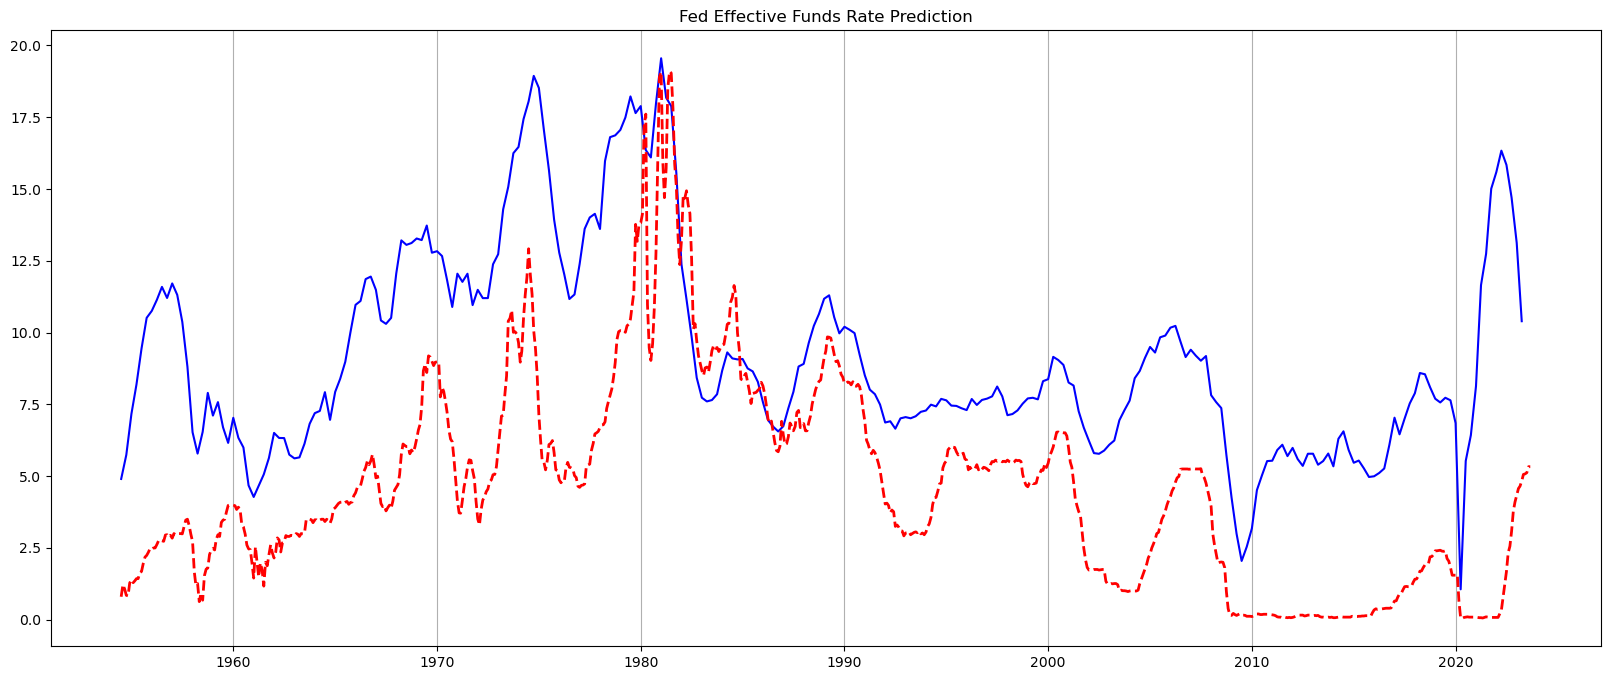

In [26]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(base2_df['taylor_date'], base2_df['GDPPOT_GDPC1_GDPDEF_PC1'], 'blue')
ax.plot(base1_df['fund_date'], base1_df['FEDFUNDS'], linestyle='--', color='red',linewidth=2)

ax.set(title='Fed Effective Funds Rate Prediction');

## Calculation 1

In [133]:
gdpc1_df = pd.read_csv('./data/GDPC1-3.csv', parse_dates=['observation_date'], skiprows=10)
print('gdpc1_df:', gdpc1_df.shape)
gdppot_df = pd.read_csv('./data/GDPPOT-3.csv', parse_dates=['observation_date'], skiprows=10)
print('gdppot_df:', gdppot_df.shape)
gdpdef_df = pd.read_csv('./data/GDPDEF.csv', parse_dates=['observation_date'], skiprows=10)
print('gdpdef_df:', gdpdef_df.shape)
fed_df = pd.read_csv('./data/FEDFUNDS.csv', parse_dates=['observation_date'], skiprows=10)
print('fed_df:', fed_df.shape)

gdpc1_df: (305, 2)
gdppot_df: (304, 2)
gdpdef_df: (302, 2)
fed_df: (831, 2)


In [134]:
taylor_df = gdpc1_df.merge(gdppot_df, how='outer', left_on='observation_date', right_on='observation_date')   \
                    .merge(gdpdef_df, how='outer', left_on='observation_date', right_on='observation_date')   \
                    .merge(fed_df, how='outer', left_on='observation_date', right_on='observation_date')
    
taylor_df.dropna(inplace=True)
taylor_df

,observation_date,GDPC1,GDPPOT,GDPDEF_PC1,FEDFUNDS
29,1954-07-01,2880.482,2727.099666,0.7,0.80
30,1954-10-01,2936.852,2743.726730,0.8,0.85
31,1955-01-01,3020.746,2760.136280,1.0,1.39
32,1955-04-01,3069.910,2777.950765,1.3,1.43
33,1955-07-01,3111.379,2795.471543,1.9,1.68
...,...,...,...,...,...
300,2022-04-01,21708.160,20153.810000,7.7,0.33
301,2022-07-01,21851.134,20245.660000,7.3,1.68
302,2022-10-01,21989.981,20334.210000,6.4,3.08
303,2023-01-01,22112.329,20420.680000,5.3,4.33


long_df: (1380, 3)


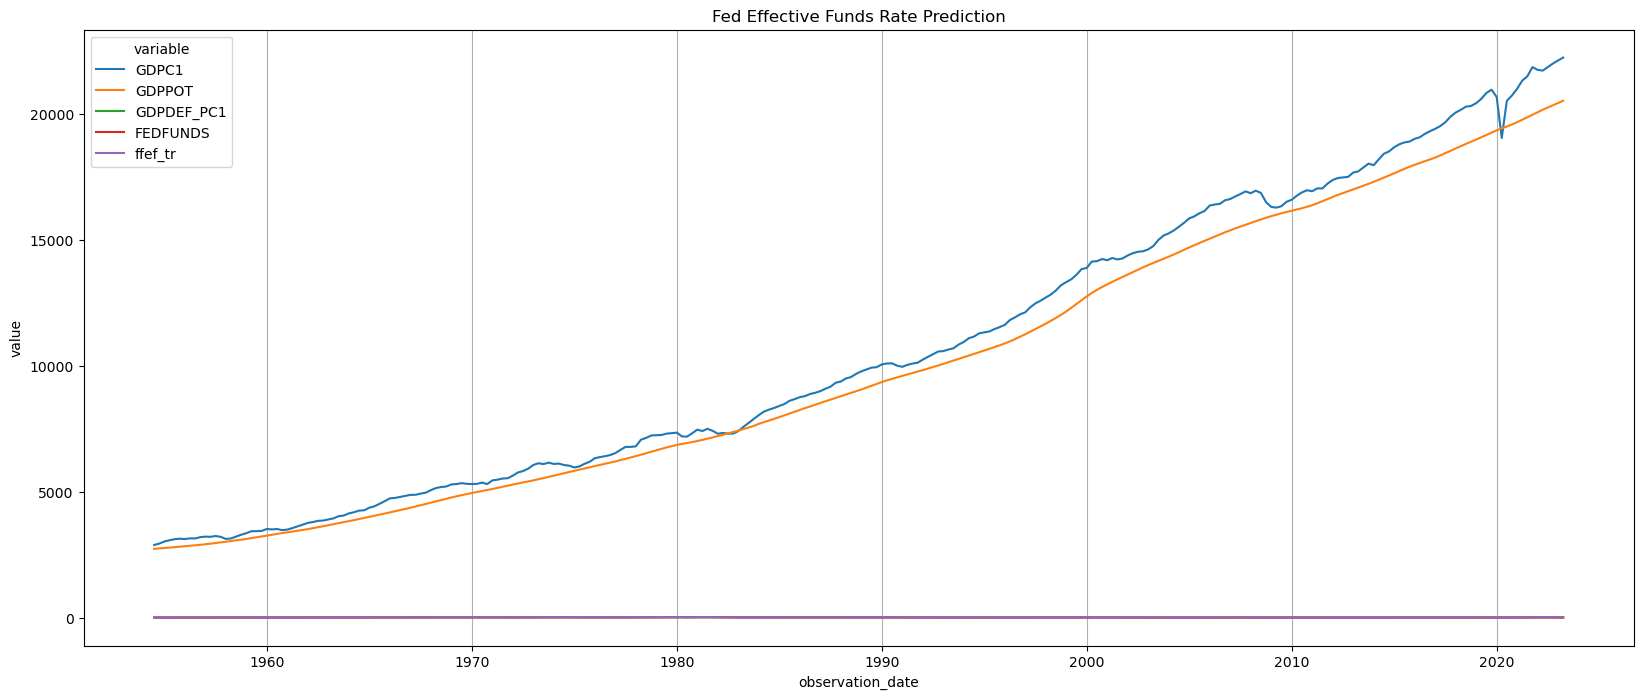

In [145]:
# Long 
long_df = taylor_df.melt(id_vars=['observation_date'])
print('long_df:', long_df.shape)

# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
#ax.plot(long_df['observation_date'], long_df['value'], color='variable')
sns.lineplot(x = 'observation_date', y = 'value', data=long_df, hue='variable')

ax.set(title='Fed Effective Funds Rate Prediction');

In [146]:
#taylor_df = pd.DataFrame()
taylor_df['ffef_tr'] = taylor_df['GDPDEF_PC1'] + 2    \
                        +0.5*(taylor_df['GDPDEF_PC1'] - 2)    \
                        +0.5*(taylor_df['GDPC1'] - taylor_df['GDPPOT']) / taylor_df['GDPPOT'] * 100

taylor_df.tail(10)

,observation_date,GDPC1,GDPPOT,GDPDEF_PC1,FEDFUNDS,ffef_tr
295,2021-01-01,20990.541,19661.616617,2.5,0.09,8.129489
296,2021-04-01,21309.544,19756.957426,4.5,0.07,11.679215
297,2021-07-01,21483.083,19856.923211,5.1,0.10,12.744692
298,2021-10-01,21847.602,19957.974448,6.2,0.08,15.034016
299,2022-01-01,21738.871,20057.880000,6.9,0.08,15.540351
300,2022-04-01,21708.160,20153.810000,7.7,0.33,16.406219
301,2022-07-01,21851.134,20245.660000,7.3,1.68,15.914983
302,2022-10-01,21989.981,20334.210000,6.4,3.08,14.671392
303,2023-01-01,22112.329,20420.680000,5.3,4.33,13.092000
304,2023-04-01,22225.350,20511.890000,3.5,4.83,10.426748


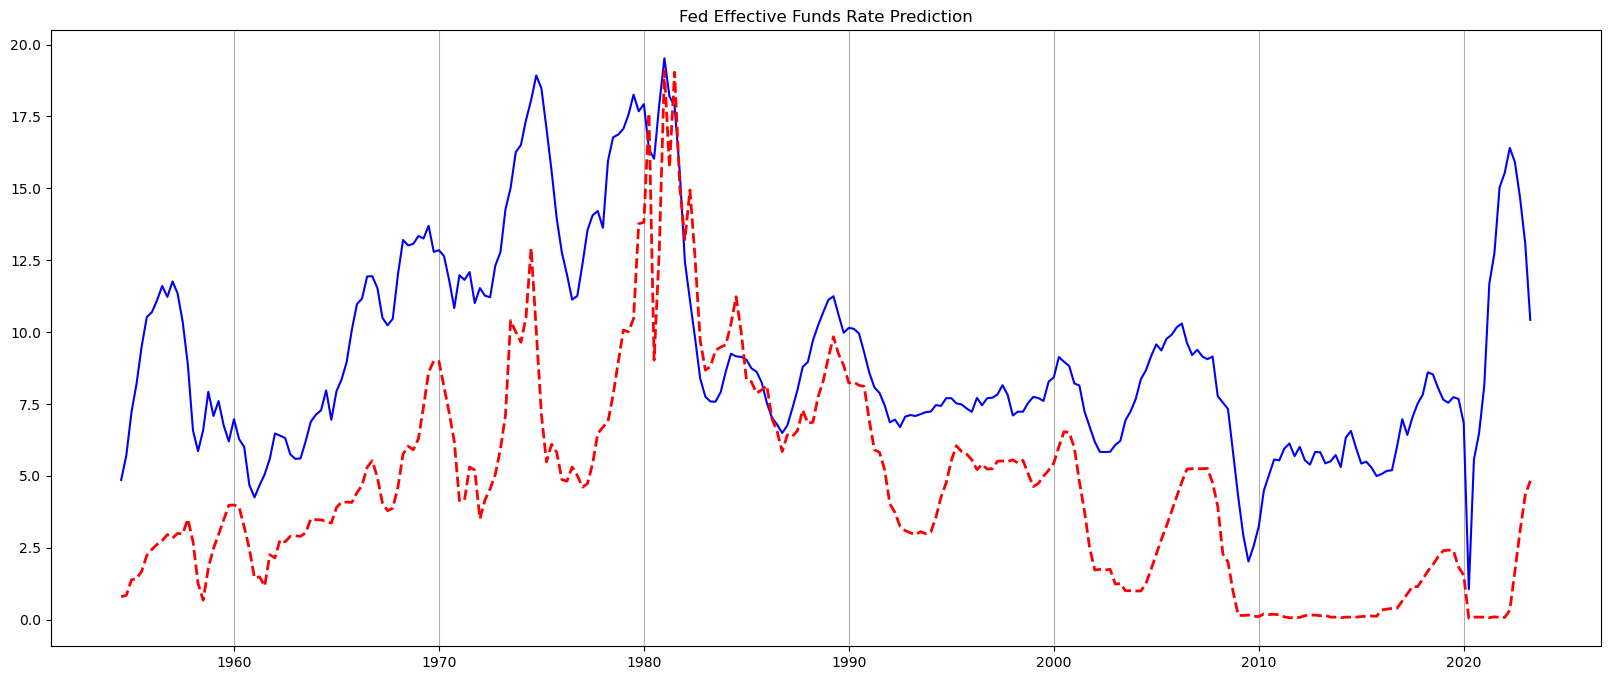

In [144]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(taylor_df['observation_date'], taylor_df['ffef_tr'], 'blue')
ax.plot(taylor_df['observation_date'], taylor_df['FEDFUNDS'], linestyle='--', color='red',linewidth=2)

ax.set(title='Fed Effective Funds Rate Prediction');

## Calculation 2

In [27]:
t_df = pdr.DataReader(['FEDFUNDS','GDPDEF','GDPC1','GDPPOT'], data_source, datetime.date(1954, 7, 1)) #.dropna()
#taylor_df = t_df[['GDPDEF','GDPC1','GDPPOT']].pct_change()
#taylor_df['FEDFUNDS'] = t_df['FEDFUNDS']
#taylor_df.dropna(inplace=True)
taylor_df = t_df.copy()
taylor_df

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT
DATE,,,,
1954-07-01,0.80,13.574,2880.482,2727.099666
1954-08-01,1.22,NaN,NaN,NaN
1954-09-01,1.07,NaN,NaN,NaN
1954-10-01,0.85,13.611,2936.852,2743.726730
1954-11-01,0.83,NaN,NaN,NaN
...,...,...,...,...
2023-06-01,5.08,NaN,NaN,NaN
2023-07-01,5.12,NaN,NaN,20603.700000
2023-08-01,5.33,NaN,NaN,NaN


In [28]:
taylor_df['ffef_tr'] = taylor_df['GDPDEF']+2    \
                        +0.5*(taylor_df['GDPDEF']-2)    \
                        +0.5*(taylor_df['GDPC1']-taylor_df['GDPPOT'])/taylor_df['GDPPOT']*100

taylor_df.head(30)

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT,ffef_tr
DATE,,,,,
1954-07-01,0.80,13.574,2880.482,2727.099666,24.173188
1954-08-01,1.22,NaN,NaN,NaN,NaN
1954-09-01,1.07,NaN,NaN,NaN,NaN
1954-10-01,0.85,13.611,2936.852,2743.726730,24.935897
1954-11-01,0.83,NaN,NaN,NaN,NaN
1954-12-01,1.28,NaN,NaN,NaN,NaN
1955-01-01,1.39,13.675,3020.746,2760.136280,26.233457
1955-02-01,1.29,NaN,NaN,NaN,NaN
1955-03-01,1.35,NaN,NaN,NaN,NaN


In [29]:
taylor_df['ffef_tr'] = taylor_df['GDPDEF'] + 2       \
                        + 0.5 * (taylor_df['GDPDEF'] - 2)       \
                        + 0.5 * (taylor_df['GDPC1'] - taylor_df['GDPPOT'] ) / taylor_df['GDPPOT'] * 100
        
#taylor_df['ffef_tr']  = taylor_df['ffef_tr']
taylor_df 

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT,ffef_tr
DATE,,,,,
1954-07-01,0.80,13.574,2880.482,2727.099666,24.173188
1954-08-01,1.22,NaN,NaN,NaN,NaN
1954-09-01,1.07,NaN,NaN,NaN,NaN
1954-10-01,0.85,13.611,2936.852,2743.726730,24.935897
1954-11-01,0.83,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-01,5.08,NaN,NaN,NaN,NaN
2023-07-01,5.12,NaN,NaN,20603.700000,NaN
2023-08-01,5.33,NaN,NaN,NaN,NaN


In [30]:
taylor_df['ffef_tr'] = taylor_df['GDPDEF'] + 0.02       \
                        + 0.5 * (taylor_df['GDPDEF'] - 0.02)       \
                        + 0.5 * (taylor_df['GDPC1'] - taylor_df['GDPPOT'] ) / taylor_df['GDPPOT'] / 100
        
taylor_df['ffef_tr']  = taylor_df['ffef_tr'] * 100
taylor_df 

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT,ffef_tr
DATE,,,,,
1954-07-01,0.80,13.574,2880.482,2727.099666,2037.128122
1954-08-01,1.22,NaN,NaN,NaN,NaN
1954-09-01,1.07,NaN,NaN,NaN,NaN
1954-10-01,0.85,13.611,2936.852,2743.726730,2042.685194
1954-11-01,0.83,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-01,5.08,NaN,NaN,NaN,NaN
2023-07-01,5.12,NaN,NaN,20603.700000,NaN
2023-08-01,5.33,NaN,NaN,NaN,NaN


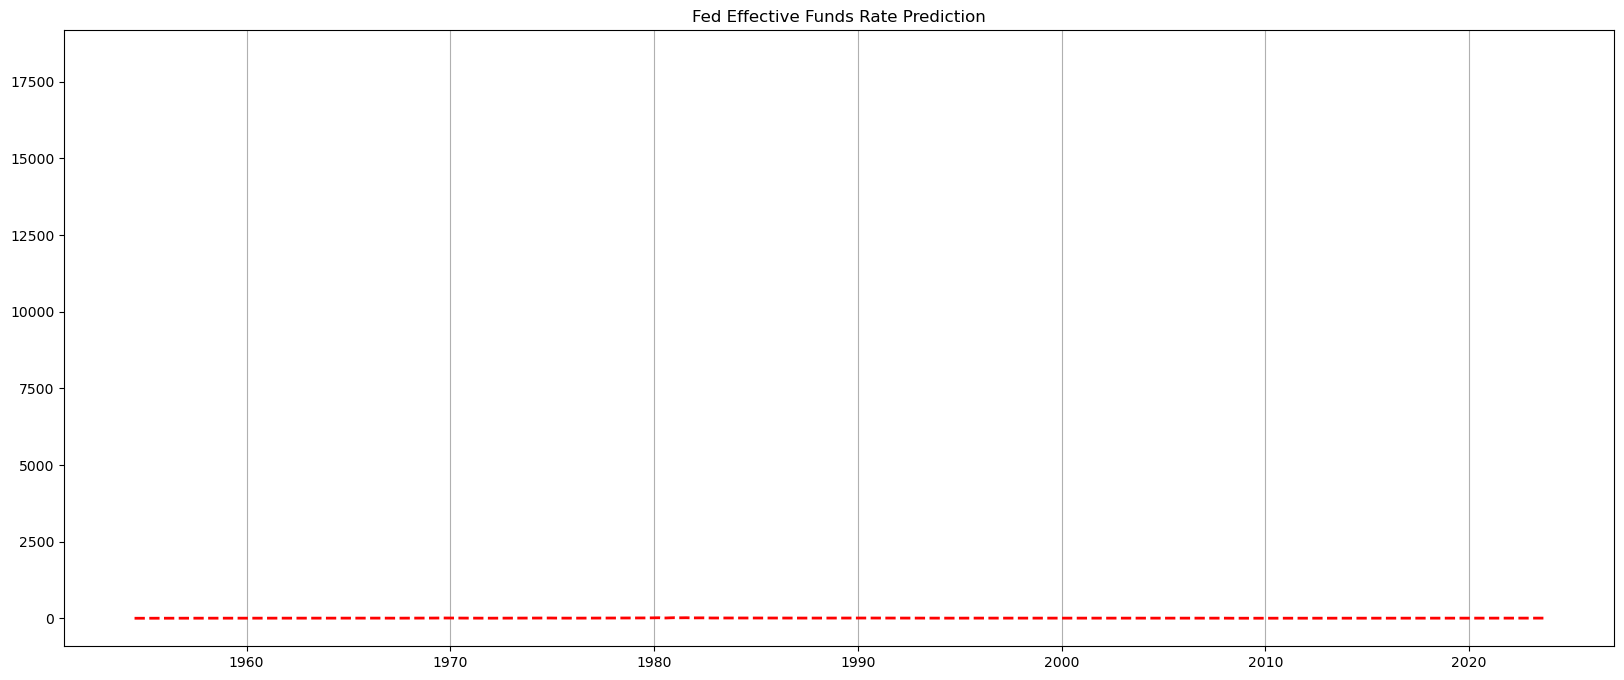

In [31]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(taylor_df.index, taylor_df['ffef_tr'], 'blue')
ax.plot(taylor_df.index, taylor_df['FEDFUNDS'], linestyle='--', color='red',linewidth=2)
#ax.fill_between(test_pred.index, test_pred['mean_ci_lower'], test_pred['mean_ci_upper'], alpha=0.20)
#ax.fill_between(test_pred.index, test_pred['obs_ci_lower'], test_pred['obs_ci_upper'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');

## Calculation 2

In [32]:
gdpc1_2017 = pdr.DataReader(['GDPC1'], data_source, datetime.date(2017, 1, 1), end=datetime.date(2017, 1, 1))['GDPC1'].iloc[0]
print('gdpc1_2017:',gdpc1_2017)
gdppot_2012 = pdr.DataReader(['GDPPOT'], data_source, datetime.date(2012, 1, 1), end=datetime.date(2012, 1, 1))['GDPPOT'].iloc[0]
print('gdppot_2012:',gdppot_2012)

gdpc1_2017: 19398.343
gdppot_2012: 16695.71826814624


In [50]:
taylor_df = pdr.DataReader(['FEDFUNDS','GDPDEF','GDPC1','GDPPOT'], data_source, datetime.date(1954, 7, 1)) #.dropna()
taylor_df.sort_values(by='DATE', inplace=True)
taylor_df['dif_GDPPOT'] = (taylor_df['GDPPOT'] - gdppot_2012) #/ gdppot_2012
taylor_df['pct_GDPPOT'] = taylor_df['dif_GDPPOT'].pct_change(periods=12)
taylor_df['dif_GDPC1'] = (taylor_df['GDPC1'] - gdpc1_2017) #/ gdpc1_2017
taylor_df['pct_GDPC1'] = taylor_df['dif_GDPC1'].pct_change(periods=12)
taylor_df['pct_GDPDEF'] = taylor_df['GDPDEF'].pct_change(periods=12)
taylor_df.dropna(inplace=True)
taylor_df.tail(10)

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT,dif_GDPPOT,pct_GDPPOT,dif_GDPC1,pct_GDPC1,pct_GDPDEF
DATE,,,,,,,,,
2021-01-01,0.09,107.668,20990.541,19661.616617,2965.898348,0.123106,1592.198,0.256459,0.025048
2021-04-01,0.07,109.305,21309.544,19756.957426,3061.239157,0.123989,1911.201,-6.257586,0.044841
2021-07-01,0.10,110.920,21483.083,19856.923211,3161.204943,0.131162,2084.740,0.872338,0.050996
2021-10-01,0.08,112.848,21847.602,19957.974448,3262.256180,0.133757,2449.259,0.847403,0.061849
2022-01-01,0.08,115.135,21738.871,20057.880000,3362.161732,0.133607,2340.528,0.469998,0.069352
2022-04-01,0.33,117.671,21708.160,20153.810000,3458.091732,0.129638,2309.817,0.208568,0.076538
2022-07-01,1.68,118.962,21851.134,20245.660000,3549.941732,0.122971,2452.791,0.176545,0.072503
2022-10-01,3.08,120.093,21989.981,20334.210000,3638.491732,0.115330,2591.638,0.058131,0.064201
2023-01-01,4.33,121.261,22112.329,20420.680000,3724.961732,0.107907,2713.986,0.159561,0.053207


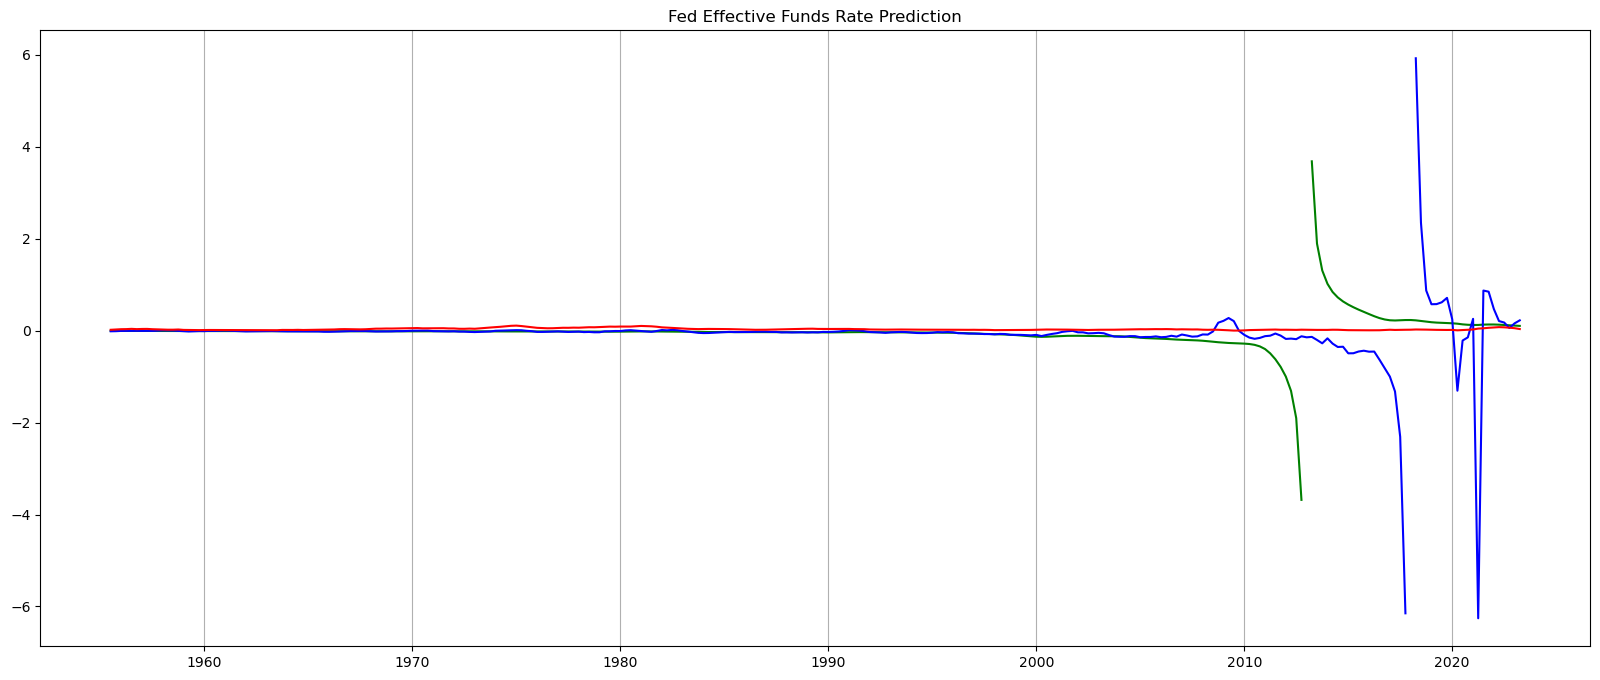

In [51]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(taylor_df.index, taylor_df['pct_GDPPOT'], 'green')
ax.plot(taylor_df.index, taylor_df['pct_GDPC1'], 'blue')
ax.plot(taylor_df.index, taylor_df['pct_GDPDEF'], 'red')
#ax.plot(taylor_df.index, taylor_df['FEDFUNDS'], linestyle='--', color='red',linewidth=2)
#ax.fill_between(test_pred.index, test_pred['mean_ci_lower'], test_pred['mean_ci_upper'], alpha=0.20)
#ax.fill_between(test_pred.index, test_pred['obs_ci_lower'], test_pred['obs_ci_upper'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');

In [35]:
+0.5 * (taylor_df['pct_GDPC1'] - taylor_df['pct_GDPPOT'] ) / taylor_df['pct_GDPPOT'] * 100

DATE
1955-07-01     8.585162
1955-10-01     8.594260
1956-01-01     8.715252
1956-04-01     8.697520
1956-07-01     8.786174
                ...    
2022-04-01   -16.602722
2022-07-01   -15.453081
2022-10-01   -14.385820
2023-01-01   -13.570283
2023-04-01   -12.960171
Freq: 3MS, Length: 272, dtype: float64

In [46]:
taylor_df['ffef_tr'] = taylor_df['pct_GDPDEF'] + 2       \
                        + 0.5 * (taylor_df['pct_GDPDEF'] - 2)       \
                        + 0.5 * (taylor_df['pct_GDPC1'] - taylor_df['pct_GDPPOT'] ) / taylor_df['pct_GDPPOT'] * 100
        
taylor_df['ffef_tr']  = taylor_df['ffef_tr']
taylor_df.tail(30)

,FEDFUNDS,GDPDEF,GDPC1,GDPPOT,dif_GDPPOT,pct_GDPPOT,dif_GDPC1,pct_GDPC1,pct_GDPDEF,ffef_tr
DATE,,,,,,,,,,
2016-01-01,0.34,97.496,19001.690,17970.540715,1274.822447,0.360233,-396.653,-0.457918,0.007513,-112.547464
2016-04-01,0.37,98.159,19062.709,18043.220931,1347.502663,0.313952,-335.634,-0.455228,0.008569,-121.486836
2016-07-01,0.39,98.410,19197.938,18112.571698,1416.853430,0.273453,-200.405,-0.629514,0.008475,-164.092093
2016-10-01,0.40,98.886,19304.352,18182.731377,1487.013109,0.243182,-93.991,-0.814297,0.013374,-216.405235
2017-01-01,0.65,99.390,19398.343,18258.023077,1562.304809,0.225508,0.000,-1.000000,0.019426,-270.692715
2017-04-01,0.90,99.650,19506.949,18341.091296,1645.373028,0.221054,108.606,-1.323585,0.015190,-348.358088
2017-07-01,1.15,100.162,19660.766,18431.692526,1735.974258,0.225232,262.423,-2.309463,0.017803,-561.658580
2017-10-01,1.15,100.778,19882.352,18525.540535,1829.822267,0.230535,484.009,-6.149525,0.019133,-1382.719830
2018-01-01,1.41,101.419,20044.077,18619.201319,1923.483050,0.231183,645.734,inf,0.020415,inf


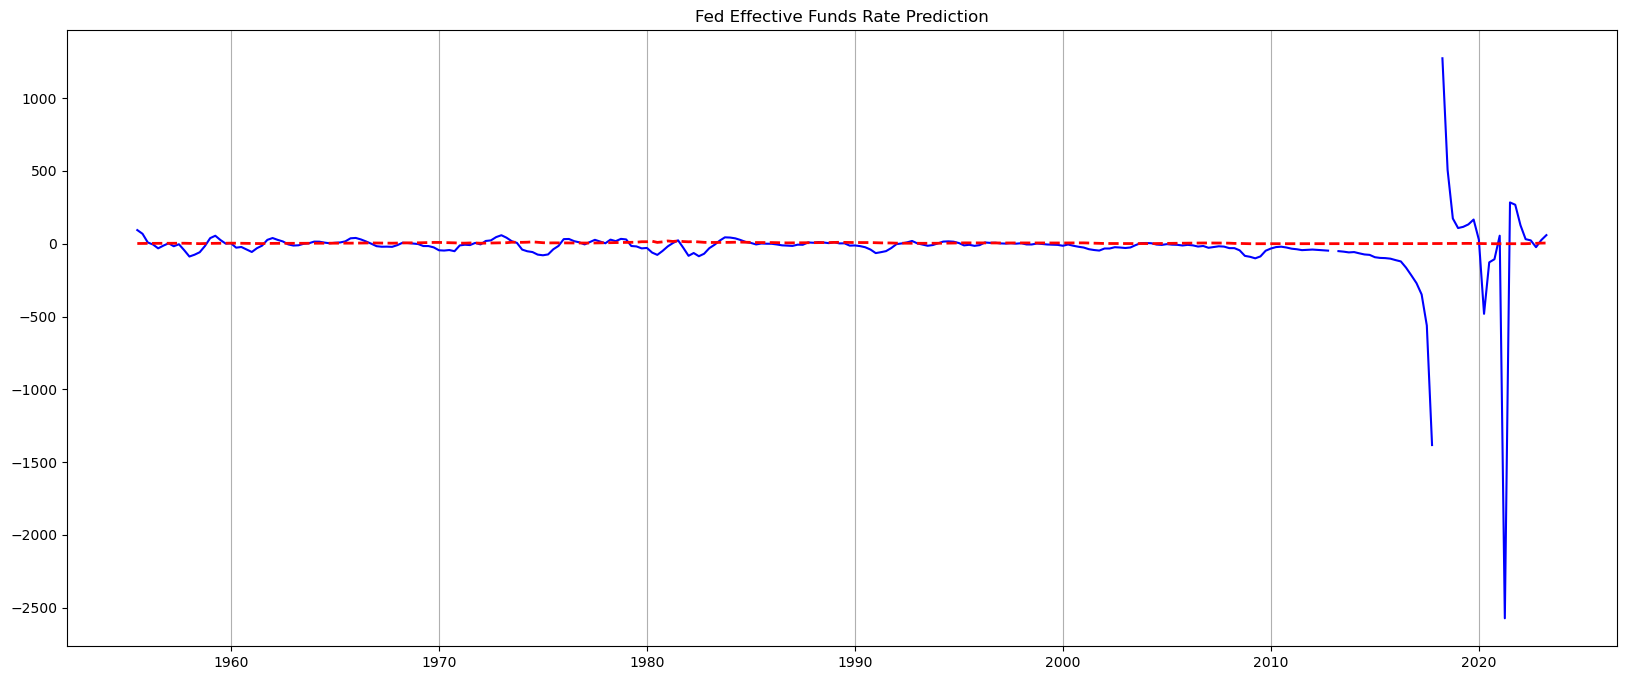

In [47]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(taylor_df.index, taylor_df['ffef_tr'], 'blue')

ax.plot(taylor_df.index, taylor_df['FEDFUNDS'], linestyle='--', color='red',linewidth=2)
#ax.fill_between(test_pred.index, test_pred['mean_ci_lower'], test_pred['mean_ci_upper'], alpha=0.20)
#ax.fill_between(test_pred.index, test_pred['obs_ci_lower'], test_pred['obs_ci_upper'], alpha=0.15)

ax.set(title='Fed Effective Funds Rate Prediction');

In [38]:
taylor_df['GDPDEF'] + 0.02 

DATE
1955-07-01     13.847
1955-10-01     13.984
1956-01-01     14.124
1956-04-01     14.207
1956-07-01     14.385
               ...   
2022-04-01    117.691
2022-07-01    118.982
2022-10-01    120.113
2023-01-01    121.281
2023-04-01    121.786
Freq: 3MS, Name: GDPDEF, Length: 272, dtype: float64

In [39]:
0.5 * (taylor_df['GDPDEF'] - 0.02)

DATE
1955-07-01     6.9035
1955-10-01     6.9720
1956-01-01     7.0420
1956-04-01     7.0835
1956-07-01     7.1725
               ...   
2022-04-01    58.8255
2022-07-01    59.4710
2022-10-01    60.0365
2023-01-01    60.6205
2023-04-01    60.8730
Freq: 3MS, Name: GDPDEF, Length: 272, dtype: float64

In [40]:
+ 0.5 * (taylor_df['GDPC1'] - taylor_df['GDPPOT'] ) / taylor_df['GDPPOT'] / 100

DATE
1955-07-01    0.000565
1955-10-01    0.000562
1956-01-01    0.000505
1956-04-01    0.000516
1956-07-01    0.000476
                ...   
2022-04-01    0.000386
2022-07-01    0.000396
2022-10-01    0.000407
2023-01-01    0.000414
2023-04-01    0.000418
Freq: 3MS, Length: 272, dtype: float64